In [10]:
import pandas as pd
import pandas_datareader.data as web
import datetime

%matplotlib inline

In [17]:
start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2020, 10, 1)

df = web.DataReader('unrate', 'fred', start, end)

In [11]:
df.head()

,unrate
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


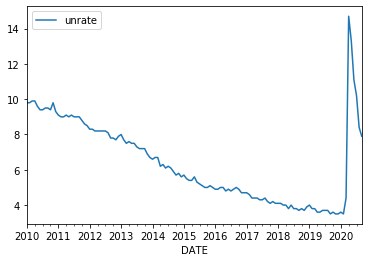

In [12]:
df.plot()

In [13]:
from fbprophet import Prophet


In [21]:
df.reset_index(inplace=True)

df.columns = ["ds", "y"]

m = Prophet()
m.fit(df)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [16]:
df.head()

,index,DS,Y
0,0,2010-01-01,9.8
1,1,2010-02-01,9.8
2,2,2010-03-01,9.9
3,3,2010-04-01,9.9
4,4,2010-05-01,9.6


In [19]:
future = m.make_future_dataframe(periods=12)
future.tail()

,ds
136,2020-09-09
137,2020-09-10
138,2020-09-11
139,2020-09-12
140,2020-09-13


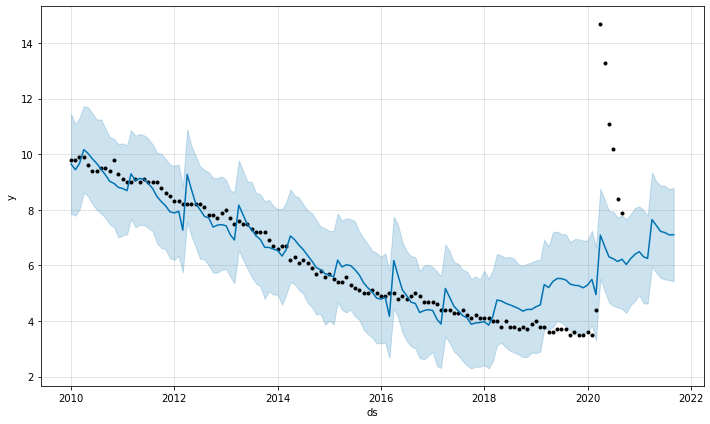

In [20]:
future = m.make_future_dataframe(periods=12, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

In [26]:
dyplot.prophet(m, forecast)

AttributeError: module 'dyplot' has no attribute 'prophet'

In [27]:
from dyplot import dyplot

ImportError: cannot import name 'dyplot' from 'dyplot' (/opt/anaconda3/lib/python3.7/site-packages/dyplot/__init__.py)

In [24]:
!pip install dyplot

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [28]:
future

,ds
0,2010-01-01
1,2010-02-01
2,2010-03-01
3,2010-04-01
4,2010-05-01
...,...
136,2021-05-01
137,2021-06-01
138,2021-07-01
139,2021-08-01


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
136,2021-05-01,7.443377,5.802624,9.199239
137,2021-06-01,7.224767,5.591050,8.920980
138,2021-07-01,7.179758,5.545701,8.882427
139,2021-08-01,7.098450,5.518074,8.787611
140,2021-09-01,7.105476,5.511265,8.807731


In [30]:
forecast.set_index("ds", inplace=True)

In [58]:
import plotly.graph_objs as go

def timeseries(df, x, yhat, lower, upper, actual, save = False):

    fig = go.Figure([
        go.Scatter(
            name='Measurement',
            x=df[x],
            y=df['yhat'],
            mode='lines',
            line=dict(color='rgb(31, 119, 180)'),
            showlegend=False
        ),
        go.Scatter(
            name='Upper Bound',
            x=df[x],
            y=df[upper],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=0),
            showlegend=False
        ),
        go.Scatter(
            name='Lower Bound',
            x=df[x],
            y=df[lower],
            marker=dict(color="#444"),
            line=dict(width=0),
            mode='lines',
            fillcolor='rgba(68, 68, 68, 0.3)',
            fill='tonexty',
            showlegend=False
        )
    ])
    fig.update_layout(
        yaxis_title='Unemployment Rate',
        title='Unemployment rate estimate using Prophet Forecast',
        hovermode="x"
    )
    fig.add_trace(go.Scatter(x=actual['ds'], y=actual["y"],
                    mode='lines+markers',
                    name='Actual values',
                    showlegend=False))
    fig.show()
    
    if save: 
        fig.write_html("unemployment rate.html")

In [36]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,9.646341,7.974099,11.268606
1,2010-02-01,9.443806,7.906281,11.039106
2,2010-03-01,9.662192,8.061091,11.279467
3,2010-04-01,10.167470,8.548098,11.838338
4,2010-05-01,10.029532,8.456948,11.704208
...,...,...,...,...
136,2021-05-01,7.443377,5.802624,9.199239
137,2021-06-01,7.224767,5.591050,8.920980
138,2021-07-01,7.179758,5.545701,8.882427
139,2021-08-01,7.098450,5.518074,8.787611


In [59]:
timeseries(forecast,'ds', 'yhat', 'yhat_lower', 'yhat_upper', actual = df, save = True)

In [48]:
df.head()

,index,ds,y
0,0,2010-01-01,9.8
1,1,2010-02-01,9.8
2,2,2010-03-01,9.9
3,3,2010-04-01,9.9
4,4,2010-05-01,9.6


In [94]:
df1 = df = web.DataReader('DHHNGSP', 'fred', start, end)

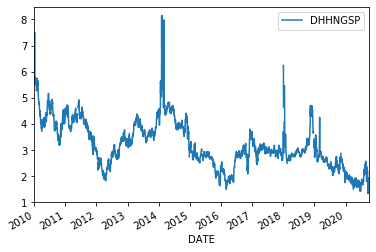

In [95]:
df1.plot()

In [62]:
MPRIME.head()

,MPRIME
DATE,
2010-01-01,3.25
2010-02-01,3.25
2010-03-01,3.25
2010-04-01,3.25
2010-05-01,3.25


In [96]:
df1.reset_index(inplace=True)

df1.columns = ["ds", "y"]

m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


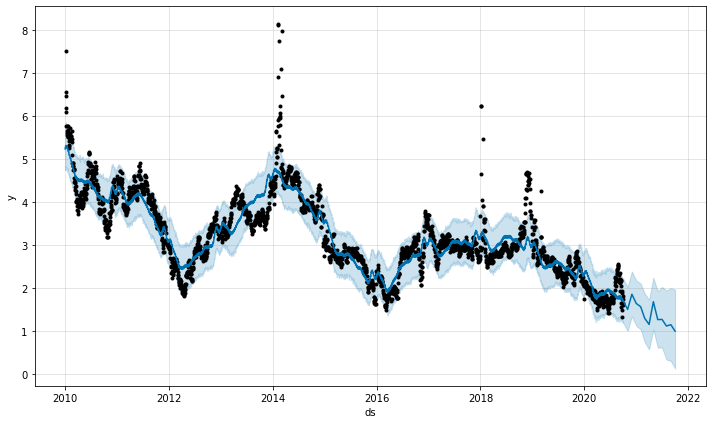

In [97]:
future = m.make_future_dataframe(periods=12, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)

In [103]:
def timeseries_trad(df,  y, periods = 10, save = False):
    shift = df.shift(periods=periods, freq="M")
    fig = go.Figure([
        go.Scatter(
            name='Actual values',
            x=df.index, 
            y=df[y],
            mode='lines+markers',
            showlegend=False
        ),
        go.Scatter(
            name='Naive Forecast',
            x=shift.index,
            y=shift[y],
            mode='lines',
            marker=dict(color="#444"),
            line=dict(width=1),
            showlegend=False
        ),
    ])
    fig.update_layout(
        yaxis_title='price',
        title='Henry Hub Natural Gas Spot Price using Prophet Forecast with shift of {}'.format(periods),
        hovermode="x"
    )
    
    fig.show()
    
    if save: 
        fig.write_html("unemployment rate.html")

In [104]:
timeseries_trad(df1,  "y", periods = 1, save = False)

In [99]:
df1.set_index("ds", inplace=True)

In [107]:
! pip install pmdarima

  Using cached pmdarima-1.7.1.tar.gz (1.1 MB)
  ERROR: Command errored out with exit status 1:
   command: /opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/setup.py'"'"'; __file__='"'"'/private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-wheel-9tc6g76l
       cwd: /private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/
  Complete output (68 lines):
  Partial import of pmdarima during the build process.
  Requirements: ['joblib>=0.11', 'Cython>=0.29,<0.29.18', 'numpy>=1.17.3', 'pandas>=0.19', 'scikit-learn>=0.22', 'scipy>=1.3.2', 'statsmodels>=0.11,<0.12

    Running setup.py install for pmdarima ... error
    ERROR: Command errored out with exit status 1:
     command: /opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/setup.py'"'"'; __file__='"'"'/private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-record-0wx58pnm/install-record.txt --single-version-externally-managed --compile --install-headers /opt/anaconda3/include/python3.7m/pmdarima
         cwd: /private/var/folders/zl/tq2s9kg97cj6nhx201p6mgg5yg_wb5/T/pip-install-9qh_ly4k/pmdarima/
    Complete output (68 lines):
    Partial import of pmdarima during the build process.
    Requ

In [106]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'